2-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
    
첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.

새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.


데이터는 sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.

데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!


회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀

다음 과정을 차례대로 진행해주세요!

(1) 데이터 가져오기

 sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
 
 diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [3]:
from sklearn.datasets import load_diabetes
import pandas as pd


diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print(df.head())
# df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# df_y = pd.DataFrame(diabetes.target, columns=['target'])

# df_X = pd.DataFrame(diabetes.data)
# df_y = pd.DataFrame(diabetes.target)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0  


(2) 모델에 입력할 데이터 X 준비하기

df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [4]:
import numpy as np

X = diabetes.data

(3) 모델에 예측할 데이터 y 준비하기

df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [5]:
y = diabetes.target

(4) train 데이터와 test 데이터로 분리하기

X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


(5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.

In [7]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

(6) 손실함수 loss 정의하기

손실함수를 MSE 함수로 정의해주세요.

In [8]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


(7) 기울기를 구하는 gradient 함수 구현하기

기울기를 계산하는 gradient 함수를 구현해주세요.

In [10]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
   
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, W, b, y)

(8) 하이퍼 파라미터인 학습률 설정하기

학습률, learning rate 를 설정해주세요

만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [11]:
LEARNING_RATE = 0.9

(9) 모델 학습하기

정의된 손실함수와 기울기 함수로 모델을 학습해주세요.

loss값이 충분히 떨어질 때까지 학습을 진행해주세요.

입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [12]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -=  LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5705.0390
Iteration 20 : Loss 4964.7593
Iteration 30 : Loss 4599.9667
Iteration 40 : Loss 4321.0259
Iteration 50 : Loss 4103.4393
Iteration 60 : Loss 3931.5232
Iteration 70 : Loss 3793.8600
Iteration 80 : Loss 3682.0962
Iteration 90 : Loss 3590.0988
Iteration 100 : Loss 3513.3466
Iteration 110 : Loss 3448.4896
Iteration 120 : Loss 3393.0309
Iteration 130 : Loss 3345.0961
Iteration 140 : Loss 3303.2669
Iteration 150 : Loss 3266.4597
Iteration 160 : Loss 3233.8381
Iteration 170 : Loss 3204.7487
Iteration 180 : Loss 3178.6753
Iteration 190 : Loss 3155.2040
Iteration 200 : Loss 3133.9991
Iteration 210 : Loss 3114.7842
Iteration 220 : Loss 3097.3291
Iteration 230 : Loss 3081.4396
Iteration 240 : Loss 3066.9499
Iteration 250 : Loss 3053.7172
Iteration 260 : Loss 3041.6173
Iteration 270 : Loss 3030.5410
Iteration 280 : Loss 3020.3921
Iteration 290 : Loss 3011.0853
Iteration 300 : Loss 3002.5441
Iteration 310 : Loss 2994.7002
Iteration 320 : Loss 2987.4922
Iteration 330 : L

Iteration 3760 : Loss 2892.1291
Iteration 3770 : Loss 2892.1113
Iteration 3780 : Loss 2892.0935
Iteration 3790 : Loss 2892.0758
Iteration 3800 : Loss 2892.0580
Iteration 3810 : Loss 2892.0403
Iteration 3820 : Loss 2892.0226
Iteration 3830 : Loss 2892.0049
Iteration 3840 : Loss 2891.9872
Iteration 3850 : Loss 2891.9695
Iteration 3860 : Loss 2891.9518
Iteration 3870 : Loss 2891.9342
Iteration 3880 : Loss 2891.9166
Iteration 3890 : Loss 2891.8989
Iteration 3900 : Loss 2891.8813
Iteration 3910 : Loss 2891.8637
Iteration 3920 : Loss 2891.8462
Iteration 3930 : Loss 2891.8286
Iteration 3940 : Loss 2891.8110
Iteration 3950 : Loss 2891.7935
Iteration 3960 : Loss 2891.7760
Iteration 3970 : Loss 2891.7584
Iteration 3980 : Loss 2891.7409
Iteration 3990 : Loss 2891.7235
Iteration 4000 : Loss 2891.7060
Iteration 4010 : Loss 2891.6885
Iteration 4020 : Loss 2891.6711
Iteration 4030 : Loss 2891.6536
Iteration 4040 : Loss 2891.6362
Iteration 4050 : Loss 2891.6188
Iteration 4060 : Loss 2891.6014
Iteratio

Iteration 6340 : Loss 2887.9613
Iteration 6350 : Loss 2887.9466
Iteration 6360 : Loss 2887.9320
Iteration 6370 : Loss 2887.9174
Iteration 6380 : Loss 2887.9028
Iteration 6390 : Loss 2887.8883
Iteration 6400 : Loss 2887.8737
Iteration 6410 : Loss 2887.8592
Iteration 6420 : Loss 2887.8446
Iteration 6430 : Loss 2887.8301
Iteration 6440 : Loss 2887.8156
Iteration 6450 : Loss 2887.8010
Iteration 6460 : Loss 2887.7865
Iteration 6470 : Loss 2887.7721
Iteration 6480 : Loss 2887.7576
Iteration 6490 : Loss 2887.7431
Iteration 6500 : Loss 2887.7287
Iteration 6510 : Loss 2887.7142
Iteration 6520 : Loss 2887.6998
Iteration 6530 : Loss 2887.6853
Iteration 6540 : Loss 2887.6709
Iteration 6550 : Loss 2887.6565
Iteration 6560 : Loss 2887.6421
Iteration 6570 : Loss 2887.6278
Iteration 6580 : Loss 2887.6134
Iteration 6590 : Loss 2887.5990
Iteration 6600 : Loss 2887.5847
Iteration 6610 : Loss 2887.5704
Iteration 6620 : Loss 2887.5560
Iteration 6630 : Loss 2887.5417
Iteration 6640 : Loss 2887.5274
Iteratio

Iteration 9890 : Loss 2883.4063
Iteration 9900 : Loss 2883.3951
Iteration 9910 : Loss 2883.3839
Iteration 9920 : Loss 2883.3727
Iteration 9930 : Loss 2883.3616
Iteration 9940 : Loss 2883.3504
Iteration 9950 : Loss 2883.3393
Iteration 9960 : Loss 2883.3281
Iteration 9970 : Loss 2883.3170
Iteration 9980 : Loss 2883.3059
Iteration 9990 : Loss 2883.2948
Iteration 10000 : Loss 2883.2837


loss가 잘 줄어들었나 그래프로 확인

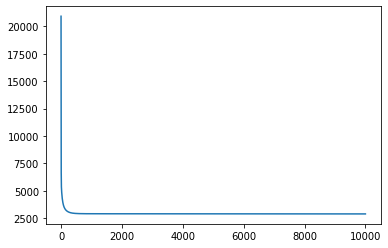

In [13]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [14]:
W, b

(array([  41.23739543, -240.70440544,  553.97563833,  344.0411219 ,
        -335.37487552,   50.72086098, -104.36069313,  192.48857496,
         507.92404182,   52.92824176]),
 151.31524272504151)

(10) test 데이터에 대한 성능 확인하기

test 데이터에 대한 성능을 확인해주세요.

In [15]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2886.5791142491857

(11) 정답 데이터와 예측한 데이터 시각화하기

x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

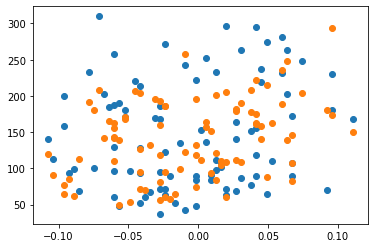

In [16]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()